<a href="https://colab.research.google.com/github/maffant20/Assignment-5/blob/main/Learning_Rate_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

#Load Data
np.random.seed(6) #For reproducibility
(X_train2, Y_train2),(X_test, Y_test) = cifar10.load_data()

#Dataset characteristics
print('Training Images Size: {}'.format(X_train2.shape))
print(X_train2[0].shape)

Training Images Size: (50000, 32, 32, 3)
(32, 32, 3)


In [92]:
# X= np.concatenate((X_train,X_test),axis=0)
# Y =  np.concatenate((Y_train,Y_test),axis=0)
# print(X.shape)
# print(Y.shape)
# np.random.seed(6)
# X_train, X_val, X_test = np.split(X.sample(frac=1), [int(0.6*len(X)),int(0.8*len(X))])

# Y_train, Y_val, Y_test = np.split(Y.sample(frac=1), [int(0.6*len(Y)),int(0.8*len(Y))])


In [93]:
idx = (Y_train2 == 0).reshape(X_train2.shape[0])
filtered_images_0 = X_train2[idx]
X_tr0 = filtered_images_0 [0:4000]
X_val0 = filtered_images_0[4000:5000]
Y_0 = Y_train2[idx]
Y_tr0 = Y_0[0:4000]
Y_val0 = Y_0[4000:5000]

idx1 = (Y_train2 == 1).reshape(X_train2.shape[0])
filtered_images_1 = X_train2[idx1]
X_tr1 = filtered_images_1 [0:4000]
X_val1 = filtered_images_1[4000:5000]
Y_1 = Y_train2[idx1]
Y_tr1 = Y_1[0:4000]
Y_val1 = Y_1[4000:5000]



idx2 = (Y_train2 == 2).reshape(X_train2.shape[0])
filtered_images_2 = X_train2[idx2]
X_tr2 = filtered_images_2 [0:4000]
X_val2 = filtered_images_2[4000:5000]
Y_2 = Y_train2[idx2]
Y_tr2 = Y_2[0:4000]
Y_val2 = Y_2[4000:5000]

idx3 = (Y_train2 == 3).reshape(X_train2.shape[0])
filtered_images_3 = X_train2[idx3]
X_tr3 = filtered_images_3 [0:4000]
X_val3 = filtered_images_3[4000:5000]
Y_3 = Y_train2[idx3]
Y_tr3 = Y_3[0:4000]
Y_val3 = Y_3[4000:5000]

idx4 = (Y_train2 == 4).reshape(X_train2.shape[0])
filtered_images_4 = X_train2[idx4]
X_tr4 = filtered_images_4 [0:4000]
X_val4 = filtered_images_4[4000:5000]
Y_4 = Y_train2[idx4]
Y_tr4 = Y_4[0:4000]
Y_val4 = Y_4[4000:5000]

idx5 = (Y_train2 == 5).reshape(X_train2.shape[0])
filtered_images_5 = X_train2[idx5]
X_tr5 = filtered_images_5 [0:4000]
X_val5 = filtered_images_5[4000:5000]
Y_5 = Y_train2[idx5]
Y_tr5 = Y_5[0:4000]
Y_val5 = Y_5[4000:5000]

idx6 = (Y_train2 == 6).reshape(X_train2.shape[0])
filtered_images_6 = X_train2[idx6]
X_tr6 = filtered_images_6 [0:4000]
X_val6 = filtered_images_6[4000:5000]
Y_6 = Y_train2[idx6]
Y_tr6 = Y_6[0:4000]
Y_val6 = Y_6[4000:5000]

idx7 = (Y_train2 == 7).reshape(X_train2.shape[0])
filtered_images_7 = X_train2[idx7]
X_tr7 = filtered_images_7 [0:4000]
X_val7 = filtered_images_7[4000:5000]
Y_7 = Y_train2[idx7]
Y_tr7 = Y_7[0:4000]
Y_val7 = Y_7[4000:5000]

idx8 = (Y_train2 == 8).reshape(X_train2.shape[0])
filtered_images_8 = X_train2[idx8]
X_tr8 = filtered_images_8 [0:4000]
X_val8 = filtered_images_8[4000:5000]
Y_8 = Y_train2[idx8]
Y_tr8 = Y_8[0:4000]
Y_val8 = Y_8[4000:5000]

idx9 = (Y_train2 == 9).reshape(X_train2.shape[0])
filtered_images_9 = X_train2[idx9]
X_tr9 = filtered_images_9 [0:4000]
X_val9 = filtered_images_9[4000:5000]
Y_9 = Y_train2[idx9]
Y_tr9 = Y_9[0:4000]
Y_val9 = Y_9[4000:5000]

X_train = np.concatenate((X_tr0,X_tr1),axis=0)
X_train = np.concatenate((X_train,X_tr2),axis =0)
X_train = np.concatenate((X_train,X_tr3),axis =0)
X_train = np.concatenate((X_train,X_tr4),axis =0)
X_train = np.concatenate((X_train,X_tr5),axis =0)
X_train = np.concatenate((X_train,X_tr6),axis =0)
X_train = np.concatenate((X_train,X_tr7),axis =0)
X_train = np.concatenate((X_train,X_tr8),axis =0)
X_train = np.concatenate((X_train,X_tr9),axis =0)

X_val = np.concatenate((X_val0,X_val1),axis=0)
X_val = np.concatenate((X_val,X_val2),axis=0)
X_val = np.concatenate((X_val,X_val3),axis=0)
X_val = np.concatenate((X_val,X_val4),axis=0)
X_val = np.concatenate((X_val,X_val5),axis=0)
X_val = np.concatenate((X_val,X_val6),axis=0)
X_val = np.concatenate((X_val,X_val7),axis=0)
X_val = np.concatenate((X_val,X_val8),axis=0)
X_val = np.concatenate((X_val,X_val9),axis=0)

Y_train = np.concatenate((Y_tr0,Y_tr1),axis=0)
Y_train = np.concatenate((Y_train,Y_tr2),axis=0)
Y_train = np.concatenate((Y_train,Y_tr3),axis=0)
Y_train = np.concatenate((Y_train,Y_tr4),axis=0)
Y_train = np.concatenate((Y_train,Y_tr5),axis=0)
Y_train = np.concatenate((Y_train,Y_tr6),axis=0)
Y_train = np.concatenate((Y_train,Y_tr7),axis=0)
Y_train = np.concatenate((Y_train,Y_tr8),axis=0)
Y_train = np.concatenate((Y_train,Y_tr9),axis=0)

Y_val = np.concatenate((Y_val0,Y_val1),axis=0)
Y_val = np.concatenate((Y_val,Y_val2),axis=0)
Y_val = np.concatenate((Y_val,Y_val3),axis=0)
Y_val = np.concatenate((Y_val,Y_val4),axis=0)
Y_val = np.concatenate((Y_val,Y_val5),axis=0)
Y_val = np.concatenate((Y_val,Y_val6),axis=0)
Y_val = np.concatenate((Y_val,Y_val7),axis=0)
Y_val = np.concatenate((Y_val,Y_val8),axis=0)
Y_val = np.concatenate((Y_val,Y_val9),axis=0)


print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)


In [94]:
# Y_0 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==0:
#     Y_0[k]= Y_train2[i]
#     k += 1 
# Y_1 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==1:
#     Y_1[k]= Y_train2[i]
#     k += 1 
# Y_2 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==2:
#     Y_2[k]= Y_train2[i]
#     k += 1   
# Y_3 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==3:
#     Y_3[k]= Y_train2[i]
#     k += 1
# Y_4 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==4:
#     Y_4[k]= Y_train2[i]
#     k += 1
# Y_5 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==5:
#     Y_5[k]= Y_train2[i]
#     k += 1
# Y_6 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==6:
#     Y_6[k]= Y_train2[i]
#     k += 1
# Y_7 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==7:
#     Y_7[k]= Y_train2[i]
#     k += 1
# Y_8 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==8:
#     Y_8[k]= Y_train2[i]
#     k += 1
# Y_9 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==9:
#     Y_9[k]= Y_train2[i]
#     k += 1


# print(Y_0.shape)

# print(Y_1.shape)

# print(Y_2.shape)


In [95]:
print(X_train.shape)
print(Y_train.shape)


(40000, 32, 32, 3)
(40000, 1)


In [96]:
for i in range(10):
  print('train_label = {}'.format(i))
  idx = (Y_train == i).reshape(X_train.shape[0])
  print('Index Shape: {}'.format(idx.shape))
  filtered_images = X_train[idx]
  print('Filtered Images Shape: {}'.format(filtered_images.shape))

train_label = 0
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 1
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 2
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 3
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 4
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 5
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 6
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 7
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 8
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 9
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)


In [97]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [98]:
#Preprocessing Dataset

#Normalize Input Images
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train2 = X_train2.astype('float32')
X_train /= 255
X_test /= 255
X_val /=255
X_train2 /= 255
print(X_train[0])

[[[0.7921569  0.8        0.78039217]
  [0.7921569  0.8        0.78039217]
  [0.8        0.80784315 0.7882353 ]
  ...
  [0.8117647  0.8156863  0.78431374]
  [0.8039216  0.80784315 0.78039217]
  [0.79607844 0.8        0.7764706 ]]

 [[0.80784315 0.8156863  0.79607844]
  [0.80784315 0.8156863  0.79607844]
  [0.8117647  0.81960785 0.8       ]
  ...
  [0.8235294  0.827451   0.8039216 ]
  [0.8156863  0.81960785 0.79607844]
  [0.80784315 0.8117647  0.7882353 ]]

 [[0.8235294  0.83137256 0.8117647 ]
  [0.827451   0.8352941  0.8156863 ]
  [0.83137256 0.8392157  0.8235294 ]
  ...
  [0.8392157  0.8392157  0.8235294 ]
  [0.83137256 0.8352941  0.8156863 ]
  [0.8235294  0.827451   0.80784315]]

 ...

 [[0.85490197 0.8509804  0.87058824]
  [0.8235294  0.81960785 0.8392157 ]
  [0.7607843  0.7607843  0.7764706 ]
  ...
  [0.9529412  0.9490196  0.96862745]
  [0.95686275 0.9490196  0.96862745]
  [0.9529412  0.9529412  0.96862745]]

 [[0.85882354 0.85490197 0.8745098 ]
  [0.8509804  0.84705883 0.8666667 ]


In [99]:
print(Y_train.shape)
print(Y_train[0])

(40000, 1)
[0]


In [100]:
#One Hot Encoding
#It avoids biases towards higher numbers
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
Y_val = np_utils.to_categorical(Y_val)
Y_train2 = np_utils.to_categorical(Y_train2)
num_classes = Y_test.shape[1]
print(Y_train.shape)
print(Y_train[0])


(40000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [101]:
print(num_classes)

10


In [102]:
print(Y_val[1000])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [103]:
for i in range(10):
  if Y_val[2000][i] == 1:
    print(classes[i])


bird


In [104]:
#Plotting Dataset Images
def plot_sam(X,Y,ide):

  plt.figure(figsize = (15,2))
  plt.imshow(X[ide])
  for i in range(10):
    if Y[ide][i]==1:
      cl = classes[i]
  plt.xlabel(cl)
  plt.show()


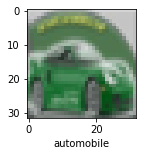

In [105]:
plot_sam(X_val,Y_val,1000)


Learning Rate = 0.001
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 44s 34ms/step - loss: 1.9094 - accuracy: 0.3002 - val_loss: 1.7989 - val_accuracy: 0.3463
Epoch 2/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.7315 - accuracy: 0.3754 - val_loss: 1.7045 - val_accuracy: 0.3855
Epoch 3/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.6518 - accuracy: 0.4045 - val_loss: 1.6284 - val_accuracy: 0.4178
Epoch 4/5
1250/1250 [==============================] - 42s 33ms/step - loss: 1.5875 - accuracy: 0.4275 - val_loss: 1.5936 - val_accuracy: 0.4360
Epoch 5/5
1250/1250 [==============================] - 46s 37ms/step - loss: 1.5385 - accuracy: 0.4473 - val_loss: 1.5939 - val_accuracy: 0.4261


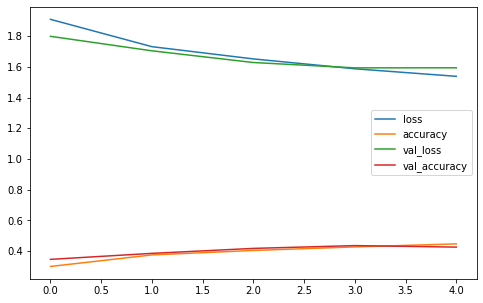

Learning Rate = 0.002
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6153 - accuracy: 0.4173 - val_loss: 1.6080 - val_accuracy: 0.4213
Epoch 2/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.5888 - accuracy: 0.4287 - val_loss: 1.5925 - val_accuracy: 0.4411
Epoch 3/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.5577 - accuracy: 0.4410 - val_loss: 1.5602 - val_accuracy: 0.4429
Epoch 4/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.5351 - accuracy: 0.4453 - val_loss: 1.6095 - val_accuracy: 0.4263
Epoch 5/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.5121 - accuracy: 0.4580 - val_loss: 1.5997 - val_accuracy: 0.4301


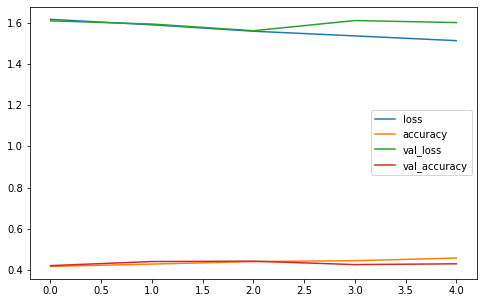

Learning Rate = 0.003
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 45s 35ms/step - loss: 1.5970 - accuracy: 0.4258 - val_loss: 1.7092 - val_accuracy: 0.3873
Epoch 2/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.5692 - accuracy: 0.4372 - val_loss: 1.6186 - val_accuracy: 0.4295
Epoch 3/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.5545 - accuracy: 0.4437 - val_loss: 1.6482 - val_accuracy: 0.4246
Epoch 4/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.5328 - accuracy: 0.4503 - val_loss: 1.5796 - val_accuracy: 0.4362
Epoch 5/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5341 - accuracy: 0.4538 - val_loss: 1.5521 - val_accuracy: 0.4504


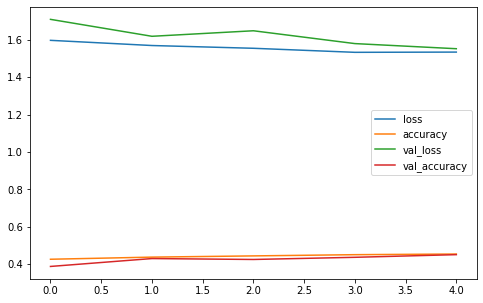

Learning Rate = 0.004
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5890 - accuracy: 0.4329 - val_loss: 1.6366 - val_accuracy: 0.4246
Epoch 2/5
1250/1250 [==============================] - 47s 37ms/step - loss: 1.5747 - accuracy: 0.4352 - val_loss: 1.6136 - val_accuracy: 0.4278
Epoch 3/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5624 - accuracy: 0.4433 - val_loss: 1.5853 - val_accuracy: 0.4423
Epoch 4/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.5510 - accuracy: 0.4487 - val_loss: 1.6262 - val_accuracy: 0.4136
Epoch 5/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5440 - accuracy: 0.4474 - val_loss: 1.6083 - val_accuracy: 0.4339


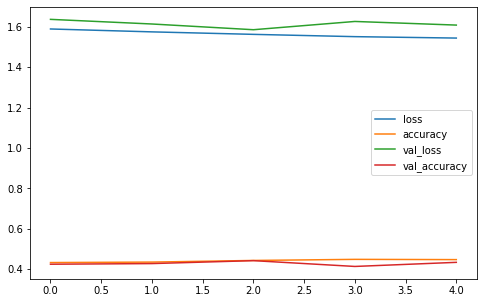

Learning Rate = 0.005
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 45s 35ms/step - loss: 1.6062 - accuracy: 0.4283 - val_loss: 1.6957 - val_accuracy: 0.4061
Epoch 2/5
1250/1250 [==============================] - 45s 36ms/step - loss: 1.5810 - accuracy: 0.4357 - val_loss: 1.6449 - val_accuracy: 0.4105
Epoch 3/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5746 - accuracy: 0.4392 - val_loss: 1.6464 - val_accuracy: 0.4188
Epoch 4/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5595 - accuracy: 0.4427 - val_loss: 1.6161 - val_accuracy: 0.4264
Epoch 5/5
1250/1250 [==============================] - 45s 36ms/step - loss: 1.5586 - accuracy: 0.4466 - val_loss: 1.6575 - val_accuracy: 0.4179


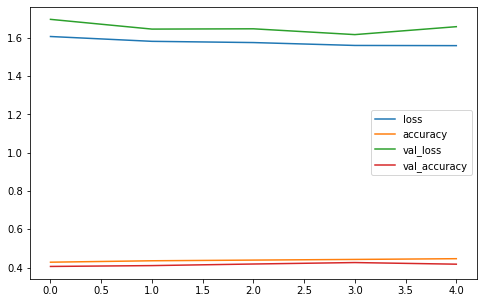

Learning Rate = 0.006
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6658 - accuracy: 0.4093 - val_loss: 1.6704 - val_accuracy: 0.4093
Epoch 2/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.6211 - accuracy: 0.4248 - val_loss: 1.7294 - val_accuracy: 0.3779
Epoch 3/5
1250/1250 [==============================] - 42s 33ms/step - loss: 1.5966 - accuracy: 0.4340 - val_loss: 1.6860 - val_accuracy: 0.3999
Epoch 4/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.5942 - accuracy: 0.4313 - val_loss: 1.7381 - val_accuracy: 0.3992
Epoch 5/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.5866 - accuracy: 0.4373 - val_loss: 1.6419 - val_accuracy: 0.4270


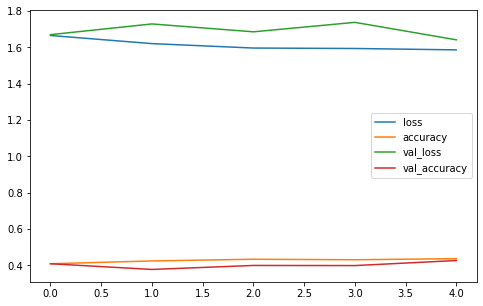

Learning Rate = 0.007
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6381 - accuracy: 0.4184 - val_loss: 1.7856 - val_accuracy: 0.3810
Epoch 2/5
1250/1250 [==============================] - 42s 33ms/step - loss: 1.6313 - accuracy: 0.4227 - val_loss: 1.6335 - val_accuracy: 0.4258
Epoch 3/5
1250/1250 [==============================] - 42s 33ms/step - loss: 1.6298 - accuracy: 0.4223 - val_loss: 1.8477 - val_accuracy: 0.3243
Epoch 4/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.6635 - accuracy: 0.4064 - val_loss: 1.7209 - val_accuracy: 0.3902
Epoch 5/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.5976 - accuracy: 0.4304 - val_loss: 1.6612 - val_accuracy: 0.4183


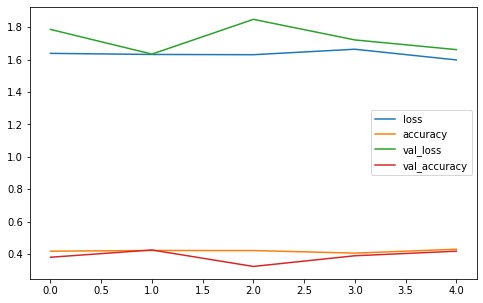

Learning Rate = 0.008
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6502 - accuracy: 0.4137 - val_loss: 1.7168 - val_accuracy: 0.3933
Epoch 2/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.6509 - accuracy: 0.4112 - val_loss: 1.7232 - val_accuracy: 0.3971
Epoch 3/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.8453 - accuracy: 0.3248 - val_loss: 1.7616 - val_accuracy: 0.3546
Epoch 4/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.7174 - accuracy: 0.3689 - val_loss: 1.7569 - val_accuracy: 0.3685
Epoch 5/5
1250/1250 [==============================] - 42s 34ms/step - loss: 1.6976 - accuracy: 0.3787 - val_loss: 2.0202 - val_accuracy: 0.3131


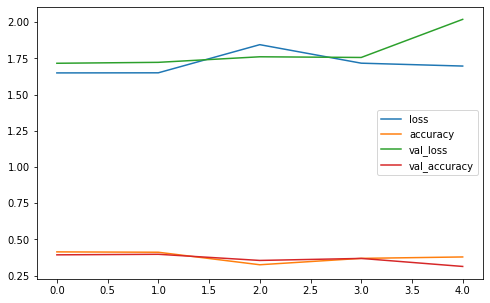

Learning Rate = 0.009
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 45s 36ms/step - loss: 1.7413 - accuracy: 0.3574 - val_loss: 1.7376 - val_accuracy: 0.3744
Epoch 2/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.8142 - accuracy: 0.3314 - val_loss: 1.8236 - val_accuracy: 0.3304
Epoch 3/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.7998 - accuracy: 0.3368 - val_loss: 1.7697 - val_accuracy: 0.3503
Epoch 4/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.7248 - accuracy: 0.3641 - val_loss: 2.0894 - val_accuracy: 0.2348
Epoch 5/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.9963 - accuracy: 0.2629 - val_loss: 2.3118 - val_accuracy: 0.0979


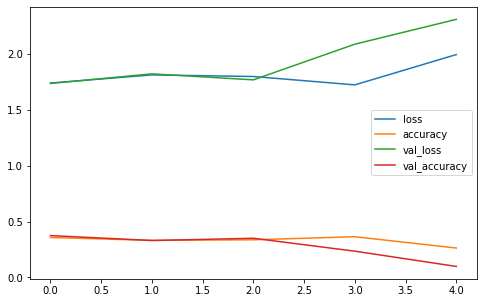

Learning Rate = 0.01
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 45s 35ms/step - loss: 2.3042 - accuracy: 0.0983 - val_loss: 2.3034 - val_accuracy: 0.1022
Epoch 2/5
1250/1250 [==============================] - 43s 34ms/step - loss: 2.3128 - accuracy: 0.1006 - val_loss: 2.3044 - val_accuracy: 0.0997
Epoch 3/5
1250/1250 [==============================] - 44s 35ms/step - loss: 2.3039 - accuracy: 0.1009 - val_loss: 2.3034 - val_accuracy: 0.1014
Epoch 4/5
1250/1250 [==============================] - 43s 35ms/step - loss: 2.3041 - accuracy: 0.0968 - val_loss: 2.3035 - val_accuracy: 0.1022
Epoch 5/5
1250/1250 [==============================] - 44s 35ms/step - loss: 2.3041 - accuracy: 0.0988 - val_loss: 2.3053 - val_accuracy: 0.0977


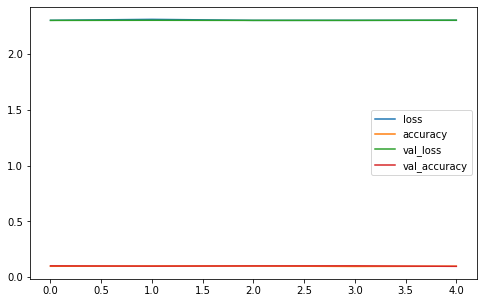

In [106]:
import pandas as pd 
ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                         layers.Flatten(),
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(400, activation = 'relu'),
                         layers.Dense(300, activation = 'relu'),
                         layers.Dense(200, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')
])
epochs = [1,2,3,4,5]
lr = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008 , 0.009,0.01]
for i in lr:
  print('Learning Rate =',i)
  ann.compile(tf.keras.optimizers.Adam(learning_rate = i),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
  print('Training Loss and Accuracy')
  history =ann.fit(X_train2, Y_train2, validation_split = 0.2, epochs = 5)
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.show()

  # print('Validation Loss and Accuracy')
  # history2 = ann.fit(X_val, Y_val, epochs = 5)
  # pd.DataFrame(history2.history).plot(figsize=(8,5))
  # plt.show()
  
  
  # # plt.plot(history.history['acc'])
  # plt.plot(history2.history['acc'])
  # plt.title('model accuracy')
  # plt.ylabel('accuracy')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()

  # plt.plot(history.history['loss'])
  # plt.plot(history2.history['loss'])
  # plt.title('model loss')
  # plt.ylabel('loss')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()


Choosen Learning Rate is 0.003 based on the conditions that Training Loss < Validation Loss and furthermore the Training Loss is reducing and Validation Loss is lowest value for this learning rate = 1.5521

In [107]:



# ann.evaluate(X_test,Y_test)